# **银行用户数据分析**

## **项目背景**

在如今大数据时代，数据的获取比以往简单了很多，利用现代化工具，数据也能被很好的保存下来，本次分析针对银行的客户数据，现如今，银行业面临着前所未有的风险，针对客户层面面临的风险就有违约风险，客户的流失风险等等，因此有必要针对客户层面做出数据分析，识别客户的类别，采取相应的措施来降低此类风险。

## **数据介绍**

本次数据来源于某银行，该数据包括一万条不同客户的信息，数据中出现的特征名解释如下：

- **CustomerId**:客户ID。
- **Surname**:客户的姓。
- **CreditScore**:客户的信用分。
- **Geography**:客户所在的国家。
- **Gender**:客户的性别。
- **Age**:客户的年龄。
- **Tenure**:客户成为银行客户的总时长（天）。
- **Balance**:客户在该行的存款。
- **NumOfProducts**:客户购买的该银行产品。
- **HasCrCard**:客户是否拥有该行的信用卡。
- **IsActiveMember**:客户是否为该行的活跃用户。
- **EstimatedSalary**:预估的客户的年收入（美元）。
- **Exited**:客户是否已经流失。

## **导入并查看数据**

In [34]:
import pandas as pd
import numpy as np
df=pd.read_csv(r"C:\Users\24517\Desktop\Churn_Modelling.csv")
df=df.drop(['RowNumber'],axis=1)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## **检查数据结构**

检查数据的结构是否存在混乱，主要检查数据是否满足每一行是单独的客户信息，每一列是单独的变量特征列。

In [11]:
df.sample(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3955,15695168,Bruce,625,France,Male,39,2,0.00,2,1,0,100403.05,0
4036,15640034,Milligan,551,France,Male,42,2,139561.46,1,1,0,43435.43,1
7871,15711602,Lowrie,676,France,Female,36,3,91711.59,1,1,1,95393.43,0
3203,15787550,Chao,719,France,Male,69,3,0.00,2,1,1,58320.06,0
8286,15636069,Plummer,632,Spain,Male,28,7,155519.59,1,1,0,1843.24,0
2777,15776233,Kruglova,758,Germany,Female,61,8,125397.21,1,1,0,182184.09,1
3520,15569248,Milanesi,554,France,Female,43,10,0.00,2,1,0,149629.13,1
1199,15769169,Trentino,645,France,Male,41,7,0.00,1,0,1,28667.56,0
8234,15677796,Becher,766,Germany,Male,47,9,129289.98,1,1,0,169935.46,1
1633,15755868,Farmer,562,France,Male,35,7,0.00,1,0,0,48869.67,0


通过随机筛选数据发现该数据并不存在结构问题。

## **检查数据内容**

检查该数据是否为脏数据，是否存在数据值缺失，数据值重复，数据值不一致以及数据值不合理的情况。

### **检查数据是否存在缺失值**

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [20]:
df.isnull().any()

CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

有上述代码可见数据并不存在缺失值。

### **检查数据是否存在重复值**

主要检查是否存在完全相同的行数据。

In [27]:
df.duplicated().any()

False

有上述结果可知该数据也不存在重复值。

### **检查数据是否存在不一致值**

主要检查分类变量是否存在两个不同名称代指同一名词的情况。

In [37]:
df.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [39]:
df.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

有上述结果可知该数据并不存在两个名称代指同一名词的情况。

### **检查数据是否存在不合理性**

主要检查数据特征能变量的取值是否符合常理。

In [36]:
df['CustomerId']=df['CustomerId'].astype('object')
df['HasCrCard']=df['HasCrCard'].astype('object')
df['IsActiveMember']=df['IsActiveMember'].astype('object')
df['Exited']=df['Exited'].astype('object')
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


由上述描述性分析结果可知，该数据并不存在数据不合理的问题。至此，数据的检查工作到此结束。

## **图表可视化分析**

通过多个纬度将数据可视化是隐藏在数据中的信息表现出来。

### **客户所在国家分布占比**

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
import warnings
warnings.filterwarnings('ignore')

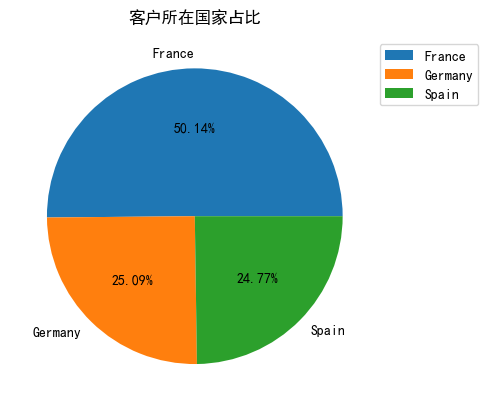

In [7]:
country_info=df.Geography.value_counts()
plt.pie(country_info.values,labels=country_info.index,autopct='%.2f%%')
plt.title('客户所在国家占比')
plt.legend(loc=[1,0.8])
plt.show()

由上述饼图可知该银行的客户来自于三个国家，其中有一半左右的客户都来自于英国，德国和西班牙的客户各占客户总数的四分之一，由此可得知该银行的本部应该在英国，并在德国和西班牙分别设立了分支机构。

### **不同性别客户视角下的可视化分析**

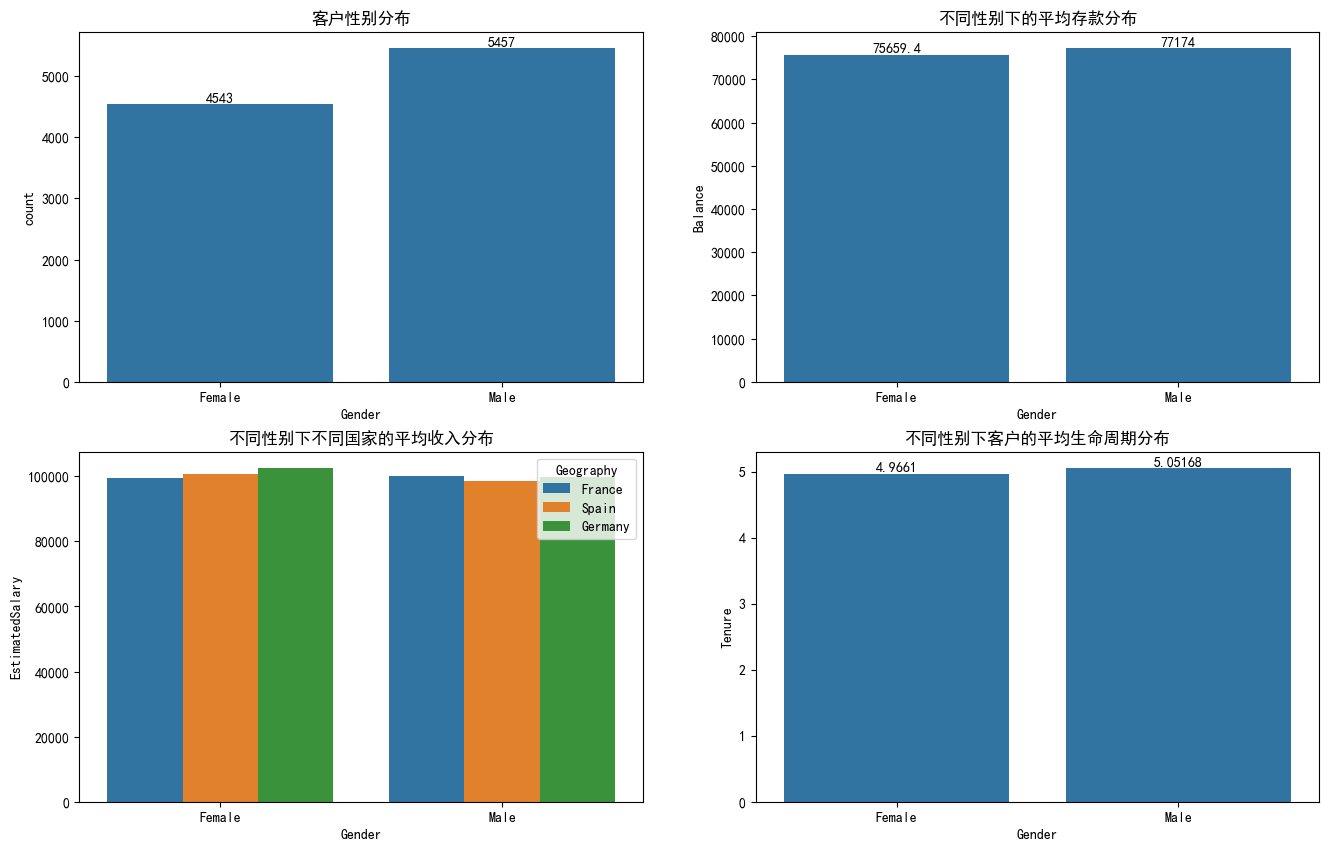

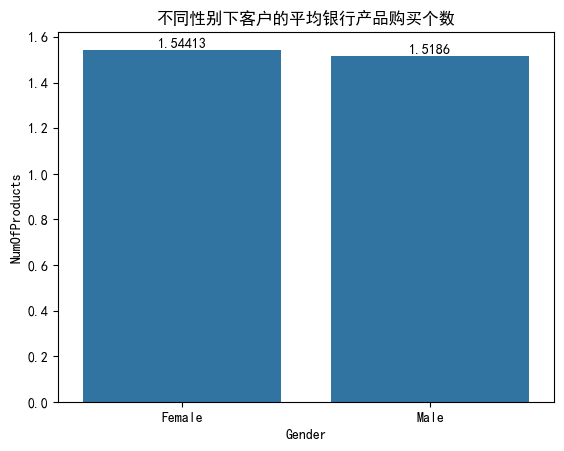

In [119]:
fig,axes=plt.subplots(2,2,figsize=(16,10))
sns.countplot(df,x='Gender',ax=axes[0,0])
axes[0,0].bar_label(axes[0,0].containers[0])
axes[0,0].set_title('客户性别分布')

sns.barplot(df,x='Gender',y='Balance',ax=axes[0,1],ci=None)
axes[0,1].bar_label(axes[0,1].containers[0])
axes[0,1].set_title('不同性别下的平均存款分布')

sns.barplot(df,x='Gender',y='EstimatedSalary',hue='Geography',ax=axes[1,0],ci=None)
axes[1,0].set_title('不同性别下不同国家的平均收入分布')

sns.barplot(df,x='Gender',y='Tenure',ax=axes[1,1],ci=None)
axes[1,1].bar_label(axes[1,1].containers[0])
axes[1,1].set_title('不同性别下客户的平均生命周期分布')

fig1=plt.figure()
bars=sns.barplot(df,x='Gender',y='NumOfProducts',ci=None)
bars.bar_label(bars.containers[0])
bars.set_title('不同性别下客户的平均银行产品购买个数')

plt.show()



由上述条形图可知男女客户占比基本持平，但男性略高于女性，这可能和当地的男女比例有关，此外，也能发现不同性别客户下的平均收入，产品平均购买量，在该行的平均存款以及平均生命周期分布大致持平，由此可见该银行在进行服务时并没有特别针对某一类性别用户，在面对不同性别的客户时都是一视同仁的。

### **客户的不同信息分布**

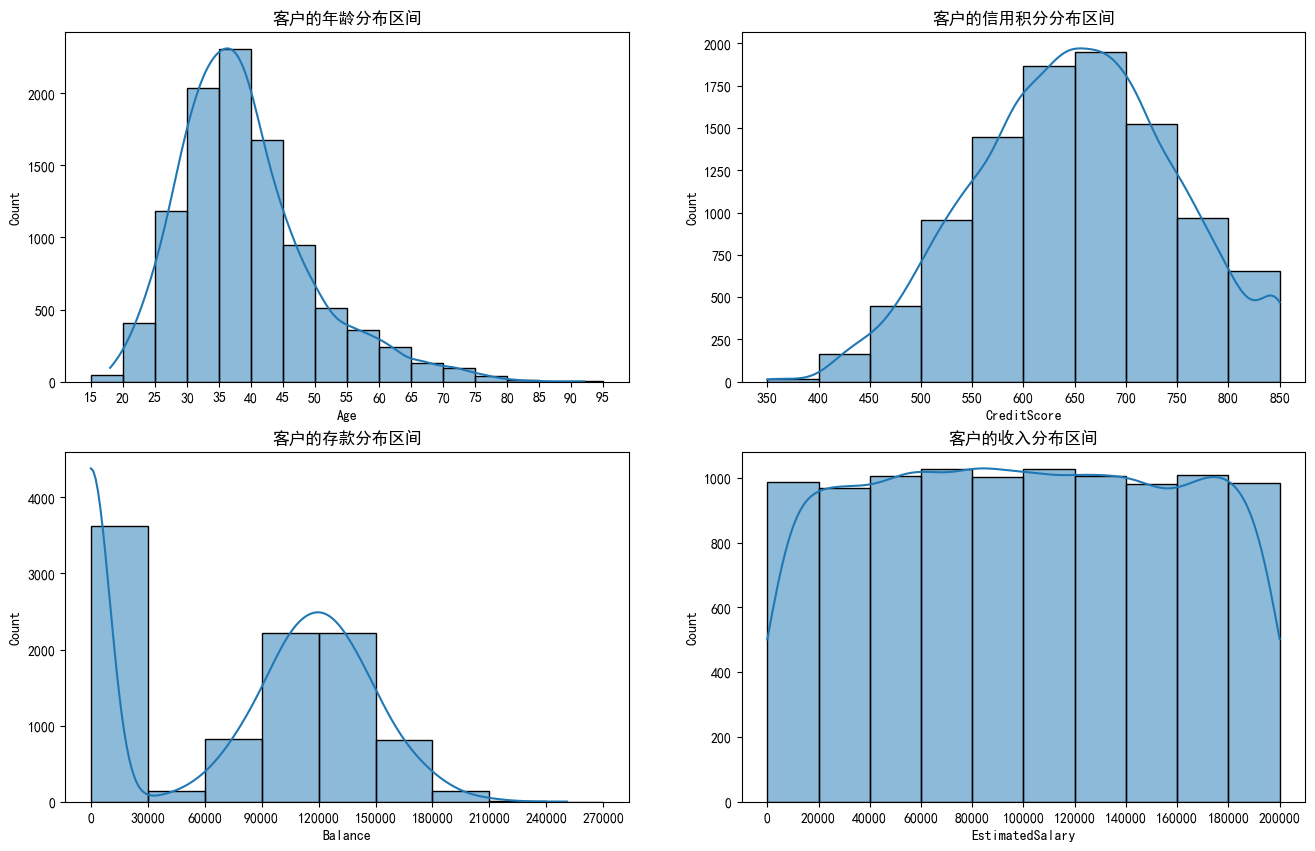

In [13]:
fig1,axes1=plt.subplots(2,2,figsize=(16,10))
sns.histplot(df,x='Age',bins=np.arange(15,100,5),kde=True,ax=axes1[0,0])
axes1[0,0].set_xticks(np.arange(15,100,5))
axes1[0,0].set_title('客户的年龄分布区间')

sns.histplot(df,x='CreditScore',bins=np.arange(350,851,50),kde=True,ax=axes1[0,1])
axes1[0,1].set_xticks(np.arange(350,851,50))
axes1[0,1].set_title('客户的信用积分分布区间')

sns.histplot(df,x='Balance',bins=np.arange(0,280000,30000),kde=True,ax=axes1[1,0])
ax=axes1[1,0].set_xticks(np.arange(0,280000,30000))
ax=axes1[1,0].set_title('客户的存款分布区间')

sns.histplot(df,x='EstimatedSalary',bins=np.arange(0,210000,20000),kde=True,ax=axes1[1,1])
ax=axes1[1,1].set_xticks(np.arange(0,210000,20000))
ax=axes1[1,1].set_title('客户的收入分布区间')

plt.show()


由上述分布直方图可知该银行客户的年龄分布呈右偏分布，年龄大多集中在20至60岁之间，以25至50岁的客户为主，说明该银行的主要客户大多为年轻群体，提供的服务和产品可能更新颖。

## **客户的聚类分析**

通过聚类分析将所有具有相同性质的客户集中为同一类，最终结果将客户分为不同的类，挖掘每一类客户的特征从而更有针对性的开展客户运营工作。

In [74]:
from sklearn.cluster import MeanShift,estimate_bandwidth
from sklearn.preprocessing import MinMaxScaler
MMS=MinMaxScaler()
x=df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
scaled_x=MMS.fit_transform(x)
bw=estimate_bandwidth(scaled_x,n_samples=100)
MS=MeanShift(bandwidth=bw, n_jobs=1)
MS.fit(scaled_x)

MeanShift(bandwidth=0.9934029677597129, n_jobs=1)

In [76]:
labels=MS.labels_
df['Clusters']=labels

In [78]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_x=pca.fit_transform(scaled_x)

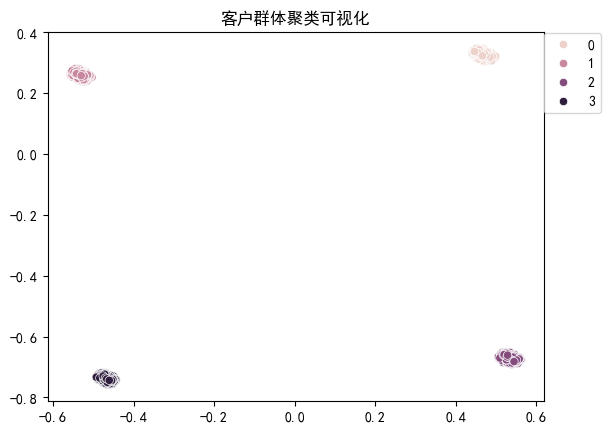

In [96]:
sns.scatterplot(x=pca_x[:,0],y=pca_x[:,1],hue=df['Clusters'])
plt.title('客户群体聚类可视化')
plt.legend(loc=[1,0.78])
plt.show()

In [110]:
centers=MS.cluster_centers_
og_centers=MMS.inverse_transform(centers)
np.set_printoptions(suppress=True)
print(og_centers)

[[   652.97359644     39.62729294      4.98499166  75004.88480545
       1.53390773      1.              1.          98706.45685103]
 [   647.22367656     37.97585806      5.12216405  76823.24534613
       1.51512507      1.              0.         100771.05703025]
 [   652.8137573      40.12329656      4.78909799  77947.08242051
       1.52044127      0.              1.         101117.32674886]
 [   649.53075823     37.97281831      5.05078684  77790.186402
       1.52432046      0.              0.         100871.3860372 ]]


由上述聚类结果可知客户群体总共被分为了四类，从降维后的散点图可以看出类与类之间的区别还是比较明显的，通过查看每一类蔟的中心点可以分析出相应类的特征，从而对客户进行精准的划分以采取不同的维护手段。

## **客户流失预测分析**

通过建立逻辑回归模型，将是否流失列作为标签，其他列作为特征，得到逻辑回归模型，该模型可用于预测一个客户是否即将要流失，并根据预测的结果采取相应的应对策略。

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
y=df['Exited'].astype(int)
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,test_size=0.3,random_state=42)
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [145]:
lr.fit(x_test,y_test)

LogisticRegression()

In [157]:
y_train_predict=lr.predict(x_train)
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy score:',accuracy_score(y_train,y_train_predict))

Accuracy score: 0.8051428571428572


In [161]:
print(confusion_matrix(y_train,y_train_predict))

[[5438  109]
 [1255  198]]


In [163]:
y_test_predict=lr.predict(x_test)
print('Accuracy score:',accuracy_score(y_test,y_test_predict))

Accuracy score: 0.8136666666666666


In [165]:
print(confusion_matrix(y_test,y_test_predict))

[[2372   44]
 [ 515   69]]


由上述结果可知该模型预测客户是否流失的正确性均在0.8以上，说明模型具有较好的预测能力，可用作其他客户是否流失的预测。